In [1]:
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
data = pd.read_csv('data/crx.data')
data

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [3]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       689 non-null    object 
 1   30.83   689 non-null    object 
 2   0       689 non-null    float64
 3   u       689 non-null    object 
 4   g       689 non-null    object 
 5   w       689 non-null    object 
 6   v       689 non-null    object 
 7   1.25    689 non-null    float64
 8   t       689 non-null    object 
 9   t.1     689 non-null    object 
 10  01      689 non-null    int64  
 11  f       689 non-null    object 
 12  g.1     689 non-null    object 
 13  00202   689 non-null    object 
 14  0.1     689 non-null    int64  
 15  +       689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 430.9 KB


In [4]:
new_cols = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income']
rename_dict = {old: new for old, new in zip(data.columns, new_cols)}
data.rename(columns=rename_dict, inplace=True)

In [5]:
data

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    object 
 1   Age             689 non-null    object 
 2   Debt            689 non-null    float64
 3   Married         689 non-null    object 
 4   BankCustomer    689 non-null    object 
 5   EducationLevel  689 non-null    object 
 6   Ethnicity       689 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         689 non-null    object 
 14  Income          689 non-null    int64  
 15  +               689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [7]:
data['ZipCode'].nunique()

170

In [8]:
data['ZipCode'].value_counts()

ZipCode
00000    132
00120     35
00200     35
00160     34
00080     30
        ... 
00231      1
00309      1
00416      1
00465      1
00256      1
Name: count, Length: 170, dtype: int64

In [9]:
to_float = ['Age', 'Debt','YearsEmployed']
for col in to_float:
    data[col] = data[col].replace('?', np.nan)
    data[col] = data[col].astype('float')

In [10]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    object 
 1   Age             677 non-null    float64
 2   Debt            689 non-null    float64
 3   Married         689 non-null    object 
 4   BankCustomer    689 non-null    object 
 5   EducationLevel  689 non-null    object 
 6   Ethnicity       689 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         689 non-null    object 
 14  Income          689 non-null    int64  
 15  +               689 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 400.0 KB


In [11]:
data['Married'].value_counts()

Married
u    518
y    163
?      6
l      2
Name: count, dtype: int64

In [12]:
data.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,677.000000,689.000000,689.000000,689.000000,689.000000
mean,31.569261,4.765631,2.224819,2.402032,1018.862119
std,11.966670,4.978470,3.348739,4.866180,5213.743149
min,13.750000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.000000,0.165000,0.000000,0.000000
50%,28.420000,2.750000,1.000000,0.000000,5.000000
75%,38.250000,7.250000,2.625000,3.000000,396.000000
max,80.250000,28.000000,28.500000,67.000000,100000.000000


In [13]:
for col in data.columns:
    if data[col].dtype == 'object':
        mode_val = data[col].value_counts().index[0]
        data[col]=data[col].fillna(mode_val)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    object 
 1   Age             677 non-null    float64
 2   Debt            689 non-null    float64
 3   Married         689 non-null    object 
 4   BankCustomer    689 non-null    object 
 5   EducationLevel  689 non-null    object 
 6   Ethnicity       689 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         689 non-null    object 
 14  Income          689 non-null    int64  
 15  +               689 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.3+ KB


In [15]:
data.isnull().sum()


Gender             0
Age               12
Debt               0
Married            0
BankCustomer       0
EducationLevel     0
Ethnicity          0
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode            0
Income             0
+                  0
dtype: int64

In [16]:
data['Age'].info

<bound method Series.info of 0      58.67
1      24.50
2      27.83
3      20.17
4      32.08
       ...  
684    21.08
685    22.67
686    25.25
687    17.92
688    35.00
Name: Age, Length: 689, dtype: float64>

In [17]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# print(data.info())
# for col in data.columns:
#     if data[col].dtypes == 'object':
#         print(col)
#         data[col]=le.fit_transform(data[col])

In [18]:
#https://www.kaggle.com/code/muhammadahmed68/credit-card-approval-predictions-85-accuracy

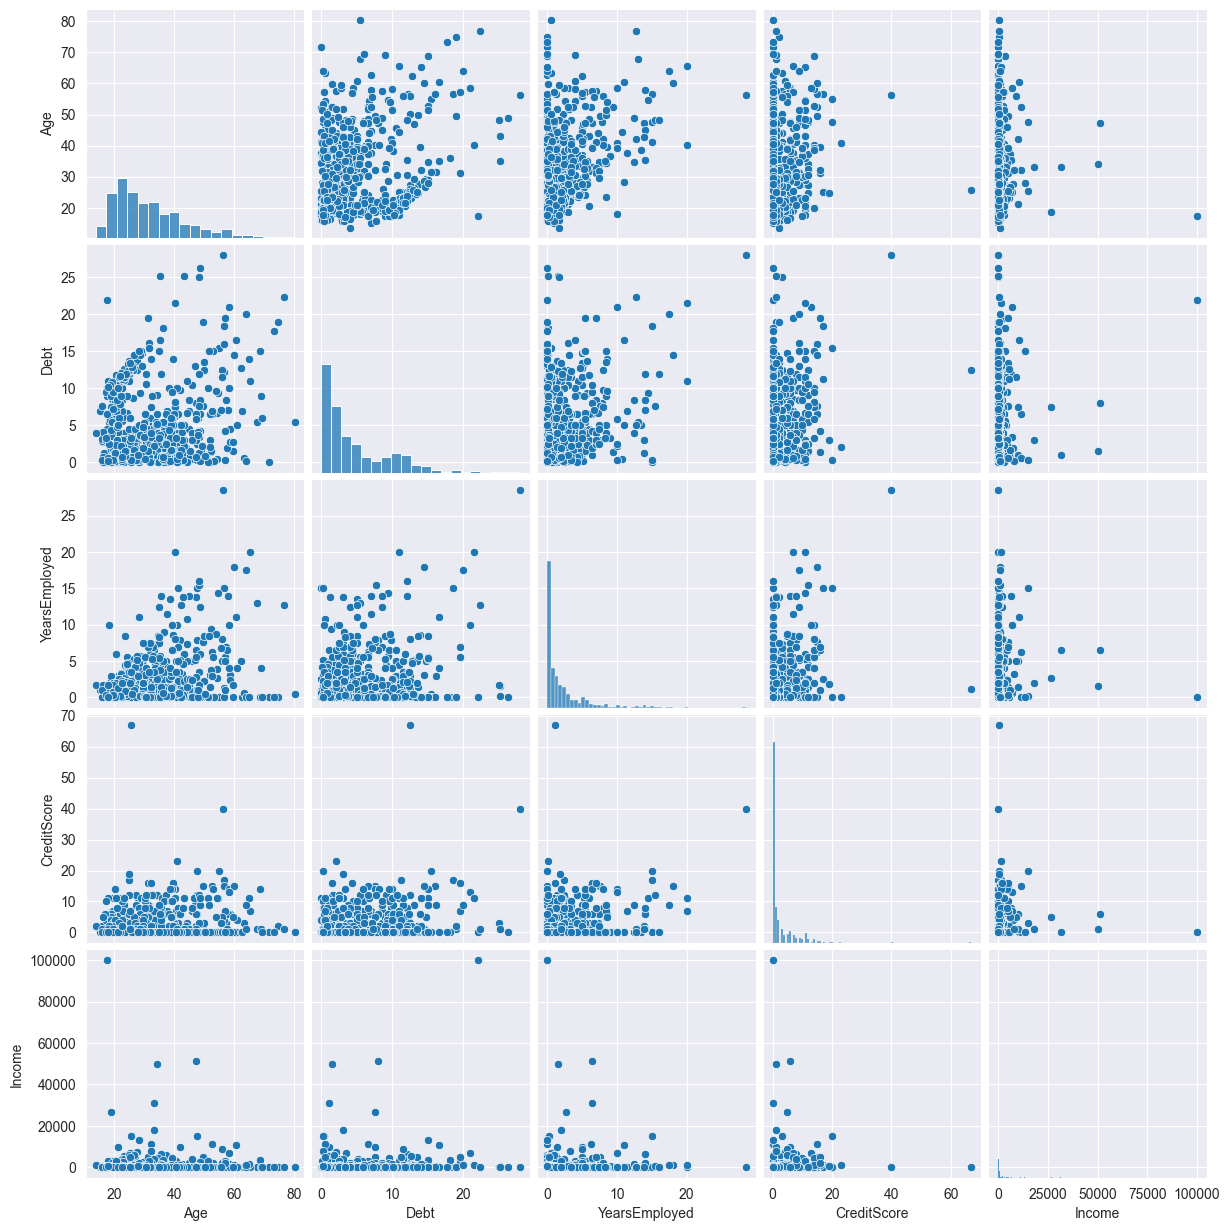

In [19]:
sns.pairplot(data)

In [20]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    object 
 1   Age             677 non-null    float64
 2   Debt            689 non-null    float64
 3   Married         689 non-null    object 
 4   BankCustomer    689 non-null    object 
 5   EducationLevel  689 non-null    object 
 6   Ethnicity       689 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         689 non-null    object 
 14  Income          689 non-null    int64  
 15  +               689 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 400.0 KB


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    object 
 1   Age             677 non-null    float64
 2   Debt            689 non-null    float64
 3   Married         689 non-null    object 
 4   BankCustomer    689 non-null    object 
 5   EducationLevel  689 non-null    object 
 6   Ethnicity       689 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         689 non-null    object 
 14  Income          689 non-null    int64  
 15  +               689 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.3+ KB


In [22]:
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            data[col].fillna(data[col].mean(), inplace=True)


In [23]:
data.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
+                 0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

le = LabelEncoder()
for col in data.columns.to_numpy():
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    int64  
 1   Age             689 non-null    float64
 2   Debt            689 non-null    float64
 3   Married         689 non-null    int64  
 4   BankCustomer    689 non-null    int64  
 5   EducationLevel  689 non-null    int64  
 6   Ethnicity       689 non-null    int64  
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    int64  
 9   Employed        689 non-null    int64  
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    int64  
 12  Citizen         689 non-null    int64  
 13  ZipCode         689 non-null    int64  
 14  Income          689 non-null    int64  
 15  +               689 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.3 KB


In [26]:
data.describe()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,+
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,1.660377,31.569261,4.765631,2.216255,1.467344,6.663280,5.991292,2.224819,0.522496,0.426705,2.402032,0.458636,0.177068,59.015965,1018.862119,0.555878
std,0.509400,11.861851,4.978470,0.477362,0.860566,4.316659,2.595263,3.348739,0.499857,0.494958,4.866180,0.498648,0.558233,47.856903,5213.743149,0.497229
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,22.670000,1.000000,2.000000,1.000000,2.000000,4.000000,0.165000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000
50%,2.000000,28.580000,2.750000,2.000000,1.000000,6.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,52.000000,5.000000,1.000000
75%,2.000000,37.750000,7.250000,2.000000,1.000000,11.000000,8.000000,2.625000,1.000000,1.000000,3.000000,1.000000,0.000000,95.000000,396.000000,1.000000
max,2.000000,80.250000,28.000000,3.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.000000,1.000000,2.000000,169.000000,100000.000000,1.000000


In [27]:
data.sample(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,+
236,2,21.33,7.500,2,1,1,8,1.415,1,1,1,0,0,23,9800,0
333,2,34.75,2.500,2,1,3,1,0.500,0,0,0,0,0,109,0,1
360,2,23.08,2.500,2,1,6,3,0.085,0,0,0,1,0,31,4208,1
396,1,23.58,0.585,3,3,6,3,0.125,0,0,0,0,0,37,87,1
477,2,22.75,11.500,2,1,7,8,0.415,0,0,0,0,0,0,0,1
466,1,30.42,1.375,2,1,13,4,0.040,0,1,3,0,0,0,33,1
570,2,21.00,3.000,3,3,4,8,1.085,1,1,8,1,0,52,1,0
390,2,39.92,5.000,2,1,7,1,0.210,0,0,0,0,0,155,0,1
293,1,16.08,0.335,2,1,6,3,0.000,0,1,1,0,0,52,126,1
319,2,21.25,1.500,2,1,13,8,1.500,0,0,0,0,0,48,8,0


In [28]:
data.drop(columns=['DriversLicense','ZipCode'],inplace=True)

In [29]:
data.rename({'+':'ApprovalStatus'},inplace=True)


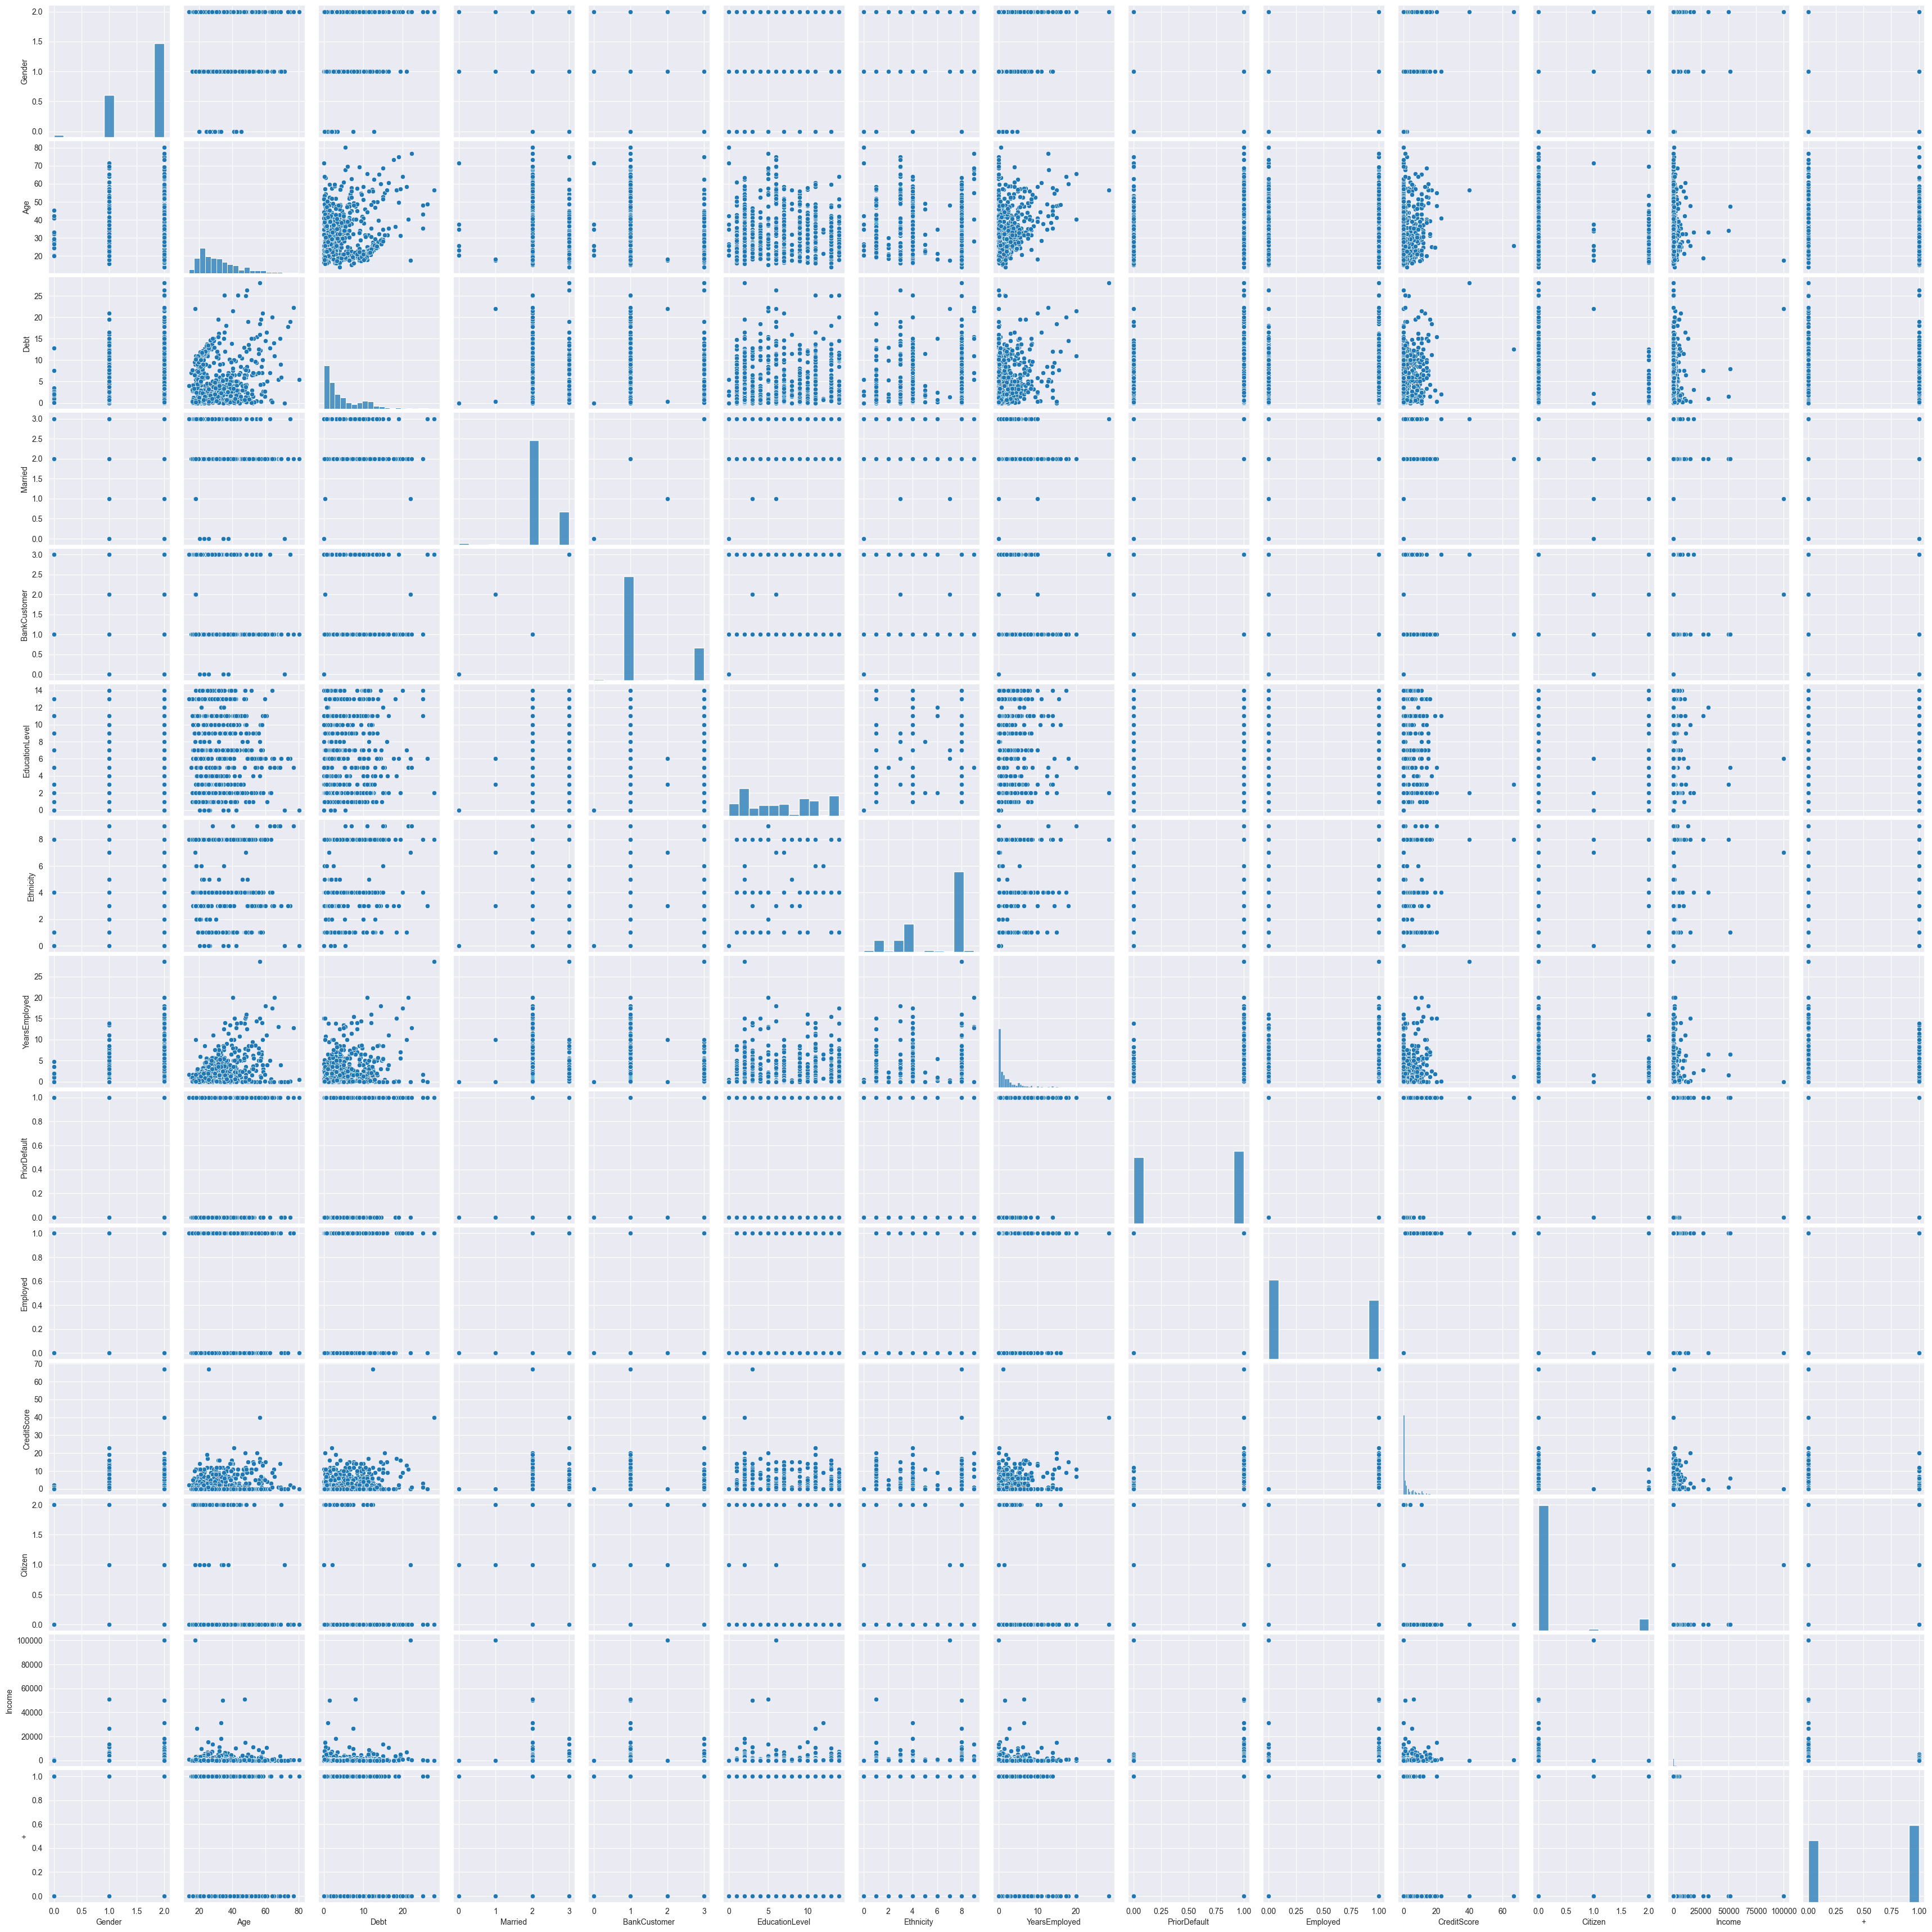

In [30]:
sns.pairplot(data)

In [31]:
X_Scaled, y_scaled = data.to_numpy()[:,0:13],data.to_numpy()[:,13]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_Scaled,y_scaled,test_size=0.2)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.transform(X_test)

In [34]:
scaler.data_max_

array([2.000e+00, 8.025e+01, 2.800e+01, 3.000e+00, 3.000e+00, 1.400e+01,
       9.000e+00, 2.850e+01, 1.000e+00, 1.000e+00, 6.700e+01, 2.000e+00,
       1.000e+05])

In [35]:
scaler.data_min_

array([ 0.  , 13.75,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ])

In [36]:
y_train.shape

(551,)

In [37]:
from tensorflow import keras
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

model = Sequential([
    Input(shape=(13,)),
    Dense(40, activation='relu'),
    Dense(40, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
epochs_hist = model.fit(
    rescaled_X_train, y_train,  # ← przeskalowane dane
    epochs=100,
    batch_size=50,
    verbose=1,
    validation_split=0.2
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4815 - loss: 0.6977 - val_accuracy: 0.7477 - val_loss: 0.6644
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8109 - loss: 0.6511 - val_accuracy: 0.8378 - val_loss: 0.6259
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8675 - loss: 0.6085 - val_accuracy: 0.8378 - val_loss: 0.5847
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8497 - loss: 0.5686 - val_accuracy: 0.8468 - val_loss: 0.5427
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8376 - loss: 0.5307 - val_accuracy: 0.8468 - val_loss: 0.5047
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8523 - loss: 0.4816 - val_accuracy: 0.8288 - val_loss: 0.4724
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8431 - loss: 0.4479 - val_accuracy: 0.8468 - val_loss: 0.4451
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8562 - loss: 0.4121 - val_accuracy: 0.8468 - val_loss:

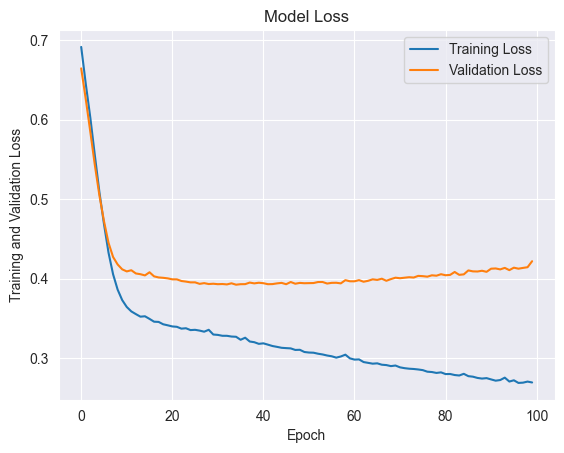

In [39]:
plt.plot(epochs_hist.history['loss'], label='loss')
plt.plot(epochs_hist.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper right')


In [40]:
y_pred_prob = model.predict(rescaled_X_test)
y_pred = (y_pred_prob > 0.5).astype(int)



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

In [42]:
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")

Accuracy:  0.9058
Precision: 0.9091
Recall:    0.9211
F1-Score:  0.9150
AUC-ROC:   0.9535


In [43]:
rescaled_X_test

array([[1.00000000e+00, 4.36090226e-01, 1.45892857e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e-03],
       [5.00000000e-01, 6.47819549e-01, 1.51785714e-01, ...,
        0.00000000e+00, 0.00000000e+00, 4.00000000e-05],
       [1.00000000e+00, 1.98045113e-01, 8.03571429e-02, ...,
        0.00000000e+00, 0.00000000e+00, 4.00000000e-02],
       ...,
       [1.00000000e+00, 1.11578947e-01, 3.12500000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 2.04000000e-03],
       [5.00000000e-01, 8.15037594e-02, 1.93392857e-01, ...,
        0.00000000e+00, 0.00000000e+00, 4.84000000e-03],
       [1.00000000e+00, 3.82255639e-01, 5.80357143e-02, ...,
        1.49253731e-01, 0.00000000e+00, 4.70000000e-02]])

In [48]:
data_sample = np.expand_dims(rescaled_X_test[0], axis=0)  # shape: (1, 13)


In [49]:
model.predict(data_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.9125491]], dtype=float32)

In [ ]:
test_sample = np.array([[1.0,0.43,0.14,0.66,0.33,0.07,0.88,0.001,0,0,0,0,0.001]])

